## import vital libraries

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px

## Manually create the dataset


In [14]:
data = {'Age': pd.Series([10,15,18,9,13,21,29,25,19,30,35,31,38,40,48,55,58,60,65,61,63,45,49,41,78,80,65,69]),
        'Country': pd.Series(['nigeria','nigeria','nigeria','nigeria','nigeria','brazil','brazil','brazil','brazil', 'australia','australia','australia','australia','australia','canada','canada','canada','canada','japan','japan','japan','usa','usa','usa','england','england','england','england']),
        'Sex': pd.Series(['m','m','m','m','m','m','m','m','m','f','f','f','f','f','m','m','m','m','f','f','f','f','f','f','m','m','m','m']),
        'Sports': pd.Series(['running','running','running','running','running','soccer','soccer','soccer','soccer','volleyball','volleyball','volleyball','volleyball','volleyball', 'boxing','boxing','boxing','boxing', 'videogames','videogames','videogames','basketball','basketball','basketball', 'golf','golf','golf','golf'])}
df = pd.DataFrame(data)
df.tail(3)

,Age,Country,Sex,Sports
25,80,england,m,golf
26,65,england,m,golf
27,69,england,m,golf


## Data Visualization

In [15]:
df2 = df.groupby('Country')['Sports'].value_counts().reset_index()
df2.head(3)

,Country,Sports,count
0,australia,volleyball,5
1,brazil,soccer,4
2,canada,boxing,4


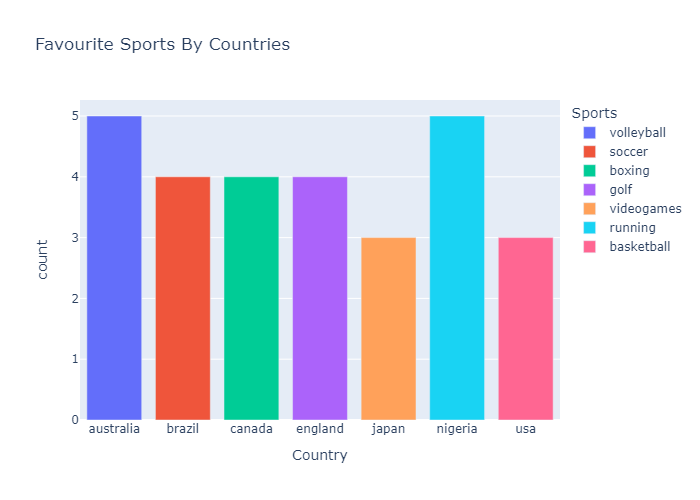

In [16]:
fig = px.bar(df2, x='Country', y='count', color='Sports', title='Favourite Sports By Countries')
fig.show(renderer='png')

In [17]:
df2 = df.groupby('Sex')['Sports'].value_counts().reset_index()
df2.head(3)

,Sex,Sports,count
0,f,volleyball,5
1,f,basketball,3
2,f,videogames,3


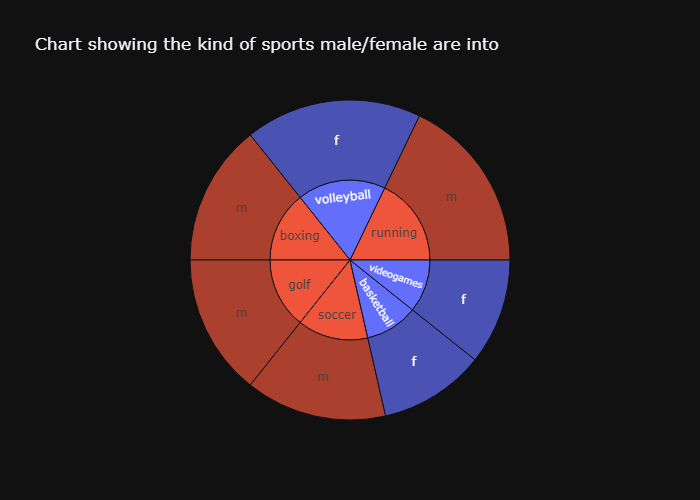

In [6]:
fig = px.sunburst(df2, path=['Sports', 'Sex'], values='count', color='Sex', template='plotly_dark', title='Chart showing the kind of sports male/female are into')
fig.show(renderer='png')

In [7]:
df2 = df['Sex'].value_counts().reset_index()
df2

,Sex,count
0,m,17
1,f,11


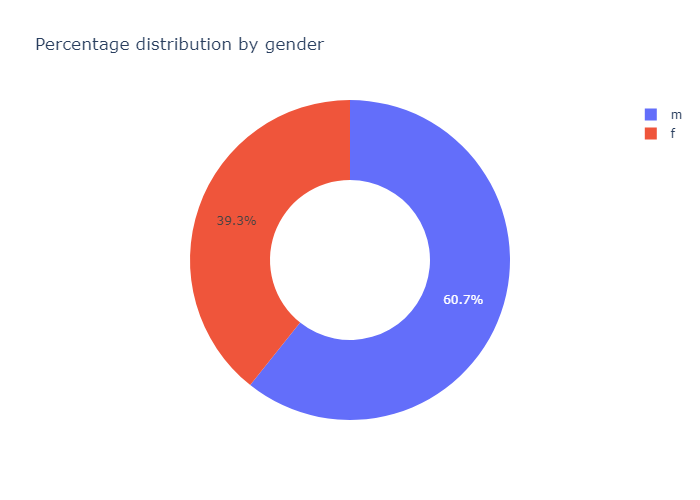

In [8]:
fig = px.pie(df2, names='Sex', values='count', hole=0.5, title='Percentage distribution by gender')
fig.show(renderer='png')

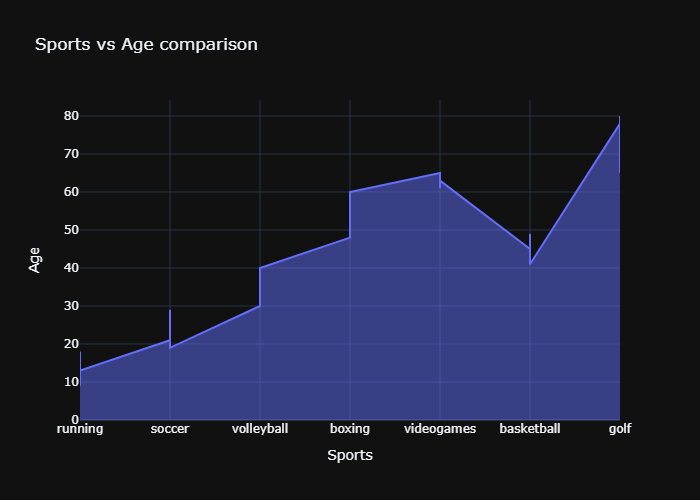

In [9]:
fig = px.area(df, x='Sports', y='Age', hover_data='Country', title='Sports vs Age comparison', template='plotly_dark')
fig.show(renderer='png')

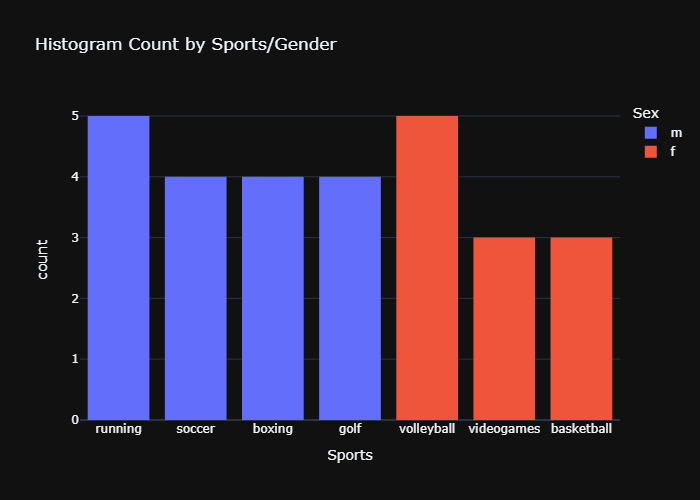

In [10]:
fig = px.histogram(df, x='Sports', nbins=15, color='Sex', title='Histogram Count by Sports/Gender',template='plotly_dark')    
fig.show(renderer='png')          
                  

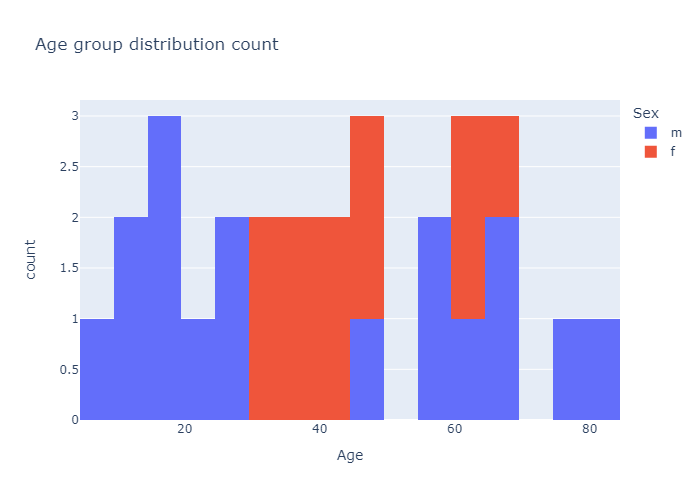

In [11]:
fig = px.histogram(df, x='Age', nbins=15, color='Sex', title='Age group distribution count')
fig.show(renderer='png')

### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"

# preprocess my data
### check null values/duplicates

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Age      28 non-null     int64 
 1   Country  28 non-null     object
 2   Sex      28 non-null     object
 3   Sports   28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [71]:
df.isnull().sum()

Age        0
Country    0
Sex        0
Sports     0
dtype: int64

In [70]:
df.duplicated().sum()

0

## feature transformation

In [16]:
from sklearn.preprocessing import OneHotEncoder
one_hot= pd.get_dummies(df['Sex'])
df = df.drop('Sex', axis=1)
new_data = one_hot.astype('int')
df = df.join(new_data)
df.head()

,Age,Country,Sports,f,m
0,10,nigeria,running,0,1
1,15,nigeria,running,0,1
2,18,nigeria,running,0,1
3,9,nigeria,running,0,1
4,13,nigeria,running,0,1


## map method for df['country']

In [18]:
df['Country'] = df['Country'].map({'nigeria':0, 'brazil':1, 'australia':2, 'canada':3, 'japan':4, 'usa':5, 'england':6})
df.head(3)

,Age,Country,Sports,f,m
0,10,0,running,0,1
1,15,0,running,0,1
2,18,0,running,0,1
3,9,0,running,0,1
4,13,0,running,0,1
5,21,1,soccer,0,1
6,29,1,soccer,0,1
7,25,1,soccer,0,1
8,19,1,soccer,0,1
9,30,2,volleyball,1,0


## display statiscal info to check for outliers

In [19]:
df.describe()

,Age,Country,f,m
count,28.000000,28.000000,28.000000,28.000000
mean,41.785714,2.750000,0.392857,0.607143
std,21.250459,2.066039,0.497347,0.497347
min,9.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,0.000000,0.000000
50%,40.500000,2.500000,0.000000,1.000000
75%,60.250000,4.250000,1.000000,1.000000
max,80.000000,6.000000,1.000000,1.000000


## Divide the dataset into input/output set

In [20]:
X = df.iloc[:,[0,1,3,4]]
y = df.iloc[:,2]



## feature scaling using robust scalar

In [21]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
X = scalar.fit_transform(X)



## split the dataset into train/test set

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


## Training our dataset

In [23]:
# from sklearn.tree import DecisionTreeClassifier
# # instantiate the model
# dtc = DecisionTreeClassifier()
# # Fit the data for training
# model = dtc.fit(x_train, y_train)
# model


DecisionTreeClassifier()

## make predictions

In [24]:
# prediction = model.predict(x_test)
# for i in prediction:
#     print(i)


volleyball
golf
running
basketball
running
volleyball


## Evaluate the model performance


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score =accuracy_score(y_test, prediction) * 100
matrix = confusion_matrix(y_test, prediction)
report = classification_report(y_test, prediction)
print(f"Accuracy score is:{score}")



Accuracy score is:83.33333333333334


c:\Users\HP\Download\envs\tflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Download\envs\tflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Download\envs\tflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save our model

In [26]:
import joblib as joblib
from joblib import dump, load
model = joblib.dump(model, 'sporty.joblib')

In [27]:
model = joblib.load('sporty.joblib')
model

DecisionTreeClassifier()

In [28]:
prediction = model.predict([[10,0,0,1],[24,1,0,1],[32,2,1,0]])
for i in prediction:
    print(f"model predicts:{i}")


model predicts:boxing
model predicts:golf
model predicts:golf
